In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import scale

In [2]:
# loading dataset
# read dataset
df = pd.read_csv("datasets/cancer-wisconsin.csv")

# show the first 10 rows from dataset
df.head(10)

,Unnamed: 0,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0,5,1,1,1,2,1.0,3,1,1,2
1,1,5,4,4,5,7,10.0,3,2,1,2
2,2,3,1,1,1,2,2.0,3,1,1,2
3,3,6,8,8,1,3,4.0,3,7,1,2
4,4,4,1,1,3,2,1.0,3,1,1,2
5,5,8,10,10,8,7,10.0,9,7,1,4
6,6,1,1,1,1,2,10.0,3,1,1,2
7,7,2,1,2,1,2,1.0,3,1,1,2
8,8,2,1,1,1,2,1.0,1,1,5,2
9,9,4,2,1,1,2,1.0,2,1,1,2


In [3]:
# adding noise and NAN values to dataset
df3 = {}
df1={'Unnamed: 0':0.0,'Clump Thickness': 5, 'Uniformity of Cell Size': 1,'Uniformity of Cell Shape':1,'Marginal Adhesion':1,'Single Epithelial Cell Size':2,'Bare Nuclei':1.0,'Bland Chromatin':3.0,'Normal Nucleoli':3,'Mitoses':1,'Class':2}
df2 = {'Clump Thickness': 5, 'Uniformity of Cell Size': 1,'Uniformity of Cell Shape':1,'Marginal Adhesion':1,'Single Epithelial Cell Size':2,'Bare Nuclei':1.0,'Normal Nucleoli':3,'Mitoses':1,'Class':2}
for i in range(50):
    df=df.append(df2, ignore_index = True)
    df=df.append(df3, ignore_index = True)
    df=df.append(df1, ignore_index = True)

df.head(-1)

,Unnamed: 0,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,2.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,3.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
827,NaN,5.0,1.0,1.0,1.0,2.0,1.0,NaN,3.0,1.0,2.0
828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
829,0.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,3.0,1.0,2.0
830,NaN,5.0,1.0,1.0,1.0,2.0,1.0,NaN,3.0,1.0,2.0


In [4]:
# Remove missing values from dataset

# print number missing value before handling in each column
print("the sum of null values in dataset befor handling missing values:")
print(df.isnull().sum()) 

# drop missing values from dataset
df = df.dropna(axis=0) # remove rows that contain missing value
print("*" * 50)

# print number missing value after handling in each column
print("the sum of null values in dataset after handling missing values:")
print(df.isnull().sum())


the sum of null values in dataset befor handling missing values:
Unnamed: 0                     100
Clump Thickness                 50
Uniformity of Cell Size         50
Uniformity of Cell Shape        50
Marginal Adhesion               50
Single Epithelial Cell Size     50
Bare Nuclei                     50
Bland Chromatin                100
Normal Nucleoli                 50
Mitoses                         50
Class                           50
dtype: int64
**************************************************
the sum of null values in dataset after handling missing values:
Unnamed: 0                     0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [5]:
# showing dataset after remove NAN values
df.head(20)

,Unnamed: 0,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
1,1.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2.0
2,2.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2.0
3,3.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2.0
4,4.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
5,5.0,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,4.0
6,6.0,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,2.0
7,7.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0
8,8.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,2.0
9,9.0,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [6]:
# remove duplicated rows

# remove duplicated rows fom dataset
df_duplicates_removed = df.drop_duplicates()

print("the shape of dataset befor remove duplicated rows is: {}".format(df.shape))
print("the shape of dataset after remove duplicated rows is: {}".format(df_duplicates_removed.shape))
print("number of rows that is removed is: {}".format(df.shape[0] - df_duplicates_removed.shape[0]))

the shape of dataset befor remove duplicated rows is: (733, 11)
the shape of dataset after remove duplicated rows is: (684, 11)
number of rows that is removed is: 49


In [7]:
# show correlated attributes 
correlated_features1 = set()
correlated_features2 = set()


# the matrix that represent correlation
correlation_matrix = df.corr()

# show correlation matrix
print("array of correlation between features is:")
#print(correlation_matrix)

# put features correlated bigger than 0.8 and less than -0.8 in two sets
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if correlation_matrix.iloc[i, j] > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features1.add(colname)
        elif correlation_matrix.iloc[i, j] < -0.8:
            colname = correlation_matrix.columns[i]
            correlated_features2.add(colname)
            
# combination two sets in one set            
correlated_features1.update(correlated_features2)

# show features that correlated greater than 0.8 and less than -0.8
print("the correlated features that greater than 0.8 and less than -0.8 is: {}".format(correlated_features1))


array of correlation between features is:
the correlated features that greater than 0.8 and less than -0.8 is: {'Class', 'Uniformity of Cell Shape'}


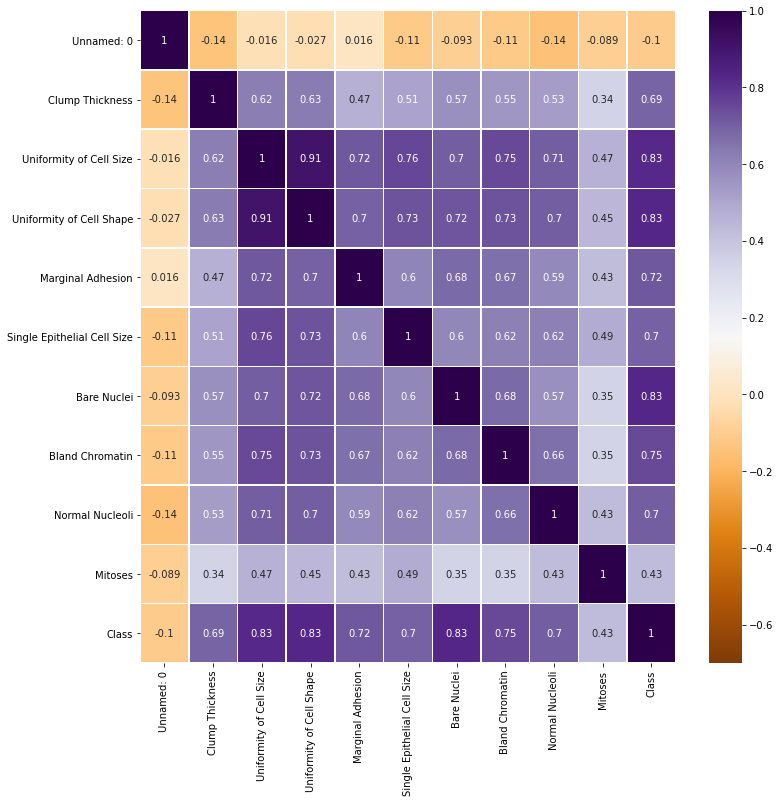

In [8]:
#Draw the correlation matrix as a map
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=0.5, linecolor="white",vmin=-0.7, cmap="PuOr")

In [9]:
# we must not remove Class attribute because it is target attribute
if "Class" in correlated_features1:
     correlated_features1.remove("Class")
        
# remove all features that correlated greater than 0.8 and less than -0.8 from dataset
df.drop(labels=correlated_features1, axis=1, inplace=True)


In [10]:
# create new file contain dataset after preprocessing
df.to_csv("datasets after cleaning/clean_classification_dataset.csv")

In [11]:
# splitting dataset to training data and testing data

# target column
target_col = "Class"

# X_train dataset
X_train = df.drop(columns=target_col)

# y_train dataset contains one feature ("price" only)
y_train = df.loc[:, target_col]

# split dataset with 70% training data and 30% testing data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0) 

# print the shape for each dataset 
print(f"shape of X_train: {X_train.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_test.shape}")

shape of X_train: (513, 9)
shape of y_train: (513,)
shape of X_test: (220, 9)
shape of y_train: (220,)


In [12]:
# K-Neighbors Algorithm
# Application of kneighbors algorithm in classification

neigh=KNeighborsClassifier()
neigh.fit(X_train,y_train)

# Calculate the expected value for y_pred
y_pred_neigh = neigh.predict(X_test)

# Calculate the accuracy of the application of the kneighbors algorithm
Accuracy = accuracy_score(y_pred_neigh,y_test)
print("Accuracy: {}".format(Accuracy * 100))

# calculate precision for kneighbors algorithm
# precision is: tp / (tp + fp)
precision = precision_score(y_test, y_pred_neigh, labels=[1,2], average='micro')
print('Precision: {}'.format(precision * 100))

# calculate recall for kneighbors algorithm
# recall is: tp / (tp + fn)
recall = recall_score(y_test, y_pred_neigh, average='micro')
print('Recall: {}'.format(recall * 100))

# calculate f1_score for kneighbors algorithm
# f1_score is: 2*tp / (2*tp + fp + fn)
score = f1_score(y_test, y_pred_neigh, average='micro')
print('F-Measure: {}'.format(score * 100))

Accuracy: 90.45454545454545
Precision: 91.13924050632912
Recall: 90.45454545454545
F-Measure: 90.45454545454545


In [13]:
#Application of DecisionTree algorithm in classification
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)

#Calculate the expected value for y_pred
y_pred_tree = tree.predict(X_test)

#Calculate the accuracy of the application of the DecisionTree algorithm
Accuracy = accuracy_score(y_pred_tree,y_test)
print("Accuracy: {}".format(Accuracy * 100))

# calculate precision for DecisionTree algorithm
# precision is: tp / (tp + fp)
precision = precision_score(y_test, y_pred_tree, labels=[1,2], average='micro')
print('Precision: {}'.format(precision * 100))

# calculate recall for DecisionTree algorithm
# recall is: tp / (tp + fn)
recall = recall_score(y_test, y_pred_tree, average='micro')
print('Recall: {}'.format(recall * 100))

# calculate f1_score for DecisionTree algorithm
# f1_score is: 2*tp / (2*tp + fp + fn)
score = f1_score(y_test, y_pred_tree, average='micro')
print('F-Measure: {}'.format(score * 100))

Accuracy: 95.0
Precision: 97.2972972972973
Recall: 95.0
F-Measure: 95.0
